# Статистический анализ аренды самокатов сервиса GoFast

**Заказчик исследования:** сервис по прокату самокатов GoFast.

**Цель исследования:** проанализировать данные и провести проверку гипотез, которые будут способствовать росту бизнеса.

Исследование базируется на данных о некоторых пользователях из нескольких городов, а также об их поездках.

**Немного информации о сервисе**

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra       
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
**Содержание**
* [Описание данных](#section_0)
* [1. Загрузка данных](#section_1)
* [2. Предобработка данных](#section_2)
    * [2.1 Приведение столбца date к типу даты](#section_2_1)
    * [2.2 Создание нового столбца с номером месяца на основе столбца date](#section_2_2)
    * [2.3 Обработка дубликатов](#section_2_3)
    * [2.4 Обработка пропусков](#section_2.4)
    * [2.5 Выводы](#section_2_5)
* [3. Исследовательский анализ данных](#section_3)
    * [3.1 Частота встречаемости городов у пользователей](#section_3_1)
    * [3.2 Соотношение пользователей с подпиской и без подписки](#section_3_2)
    * [3.3 Возраст пользователей](#section_3_3)
    * [3.4 Расстояние, которое пользователь преодолел за одну поездку](#section_3_4)
    * [3.5 Продолжительность поездок](#section_3_5)
    * [3.6 Выводы](#section_3_6)
* [4. Объединение данных](#section_4)
    * [4.1 Объединие всех данных в один датафрейм](#section_4_1)
    * [4.2 Разделение данных по пользователям с подпиской и без](#section_4_2)
    * [4.3 Визуализация информации](#section_4_3)
        * [4.3.1 Расстояние поездок для пользователей с подпиской и без](#section_4_3_1)
        * [4.3.2 Время поездок для пользователей с подпиской и без](#section_4_3_2)
    * [4.4 Выводы](#section_4_4)
* [5. Подсчёт выручки](#section_5)
    * [5.1 Помесячная агрегация данных](#section_5_1)
    * [5.2 Помесячная выручка](#section_5_2)
    * [5.3 Выводы](#section_5_3)
* [6. Проверка гипотез](#section_6)
    * [6.1 Тратят ли пользователи с подпиской больше времени на поездки?](#section_6_1)
    * [6.2 Оптимальное ли расстояние поездки у пользователей с подпиской?](#section_6_2)
    * [6.3 От каких пользователей выручка выше - с подпиской или без?](#section_6_3)
    * [6.4 Как изменилось количество обращений в техподдержку?](#section_6_4)
    * [6.5 Выводы](#section_6_5) 
* [Общие выводы](#section_7)

## Описание данных <a id="section_0"></a>

**Описание полей в датасетах**

Пользователи — `users_go.csv`

- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

Поeздки — `rides_go.csv`

- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

Подписки — `subscriptions_go.csv`

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

## 1. Загрузка данных <a id="section_1"></a>

In [1]:
# Импортируем нужные библиотеки
from scipy import stats as st
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузим необходимые для анализа датасеты 
data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
data_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
# Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.
# получение первых cтрок таблицы data_users
display(data_users.head())

# получение первых cтрок таблицы data_rides
display(data_rides.head())

# получение первых cтрок таблицы data_subs
display(data_subs.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
# Общая информация о пользователях
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
# Общая информация о поездках
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
# Общая информация о подписках
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Из общей информации, выведенной методом info(), можно сделать следующие выводы:
- Имеются три таблицы - с данными о пользователях, поездках и подписках. 
- В данных всех таблиц отсутствуют пропуски.
- Таблица с пользователями и поездками связаны идентификатором user_id.
- Таблица пользователей и информации с подписками связаны по столбцу subscription_type.


## 2. Предобработка данных <a id="section_2"></a>

### 2.1 Приведение столбца date к типу даты <a id="section_2_1"></a>

In [7]:
# Преобразуем столбец 'data_rides['date']' в тип datetime
data_rides['date'] = pd.to_datetime(data_rides['date'])

# Выведем для проверки значения из столбца df_rides['date']
data_rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

### 2.2 Создание нового столбца с номером месяца на основе столбца date <a id="section_2_2"></a>

In [8]:
# Проверим, какие года представлены в датасете о поездках
data_rides['date'].dt.year.unique()

array([2021])

In [9]:
# Добавим столбец с номером месяца
data_rides['month'] = data_rides['date'].dt.month

# Проверим 
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### 2.3 Обработка дубликатов <a id="section_2_3"></a>

In [10]:
# Проверим наличие полных дубликатов, т.е. дубликатов по всем столбцам одновременно в таблице с пользователями
data_users.duplicated().sum()

31

In [11]:
# Посмотрим на дубликаты в отсортированном виде
data_users[data_users.duplicated(keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


In [12]:
# Удалим явные дубликаты, оставив первую строку
data_users = data_users.drop_duplicates(keep='first')

# Проверим количество явных дубликатов
data_users.duplicated().sum()

0

In [13]:
# Проверим наличие полных дубликатов, т.е. дубликатов по всем столбцам одновременно в таблице с поездками
data_rides.duplicated().sum()

0

In [14]:
# Проверим наличие полных дубликатов, т.е. дубликатов по всем столбцам одновременно в таблице с подписками
data_subs.duplicated().sum()

0

### 2.4 Обработка пропусков <a id="section_2.4"></a>

На этапе загрузки данных мы увидели, что пропуски во всех трех таблицах отсутствуют.

### 2.5 Выводы <a id="section_2_5"></a>

На этапе предобоаботки данных была проделана следующая работа:
- привели столбец date к типу даты
- создали новый столбец с номером месяца в таблице с поездками
- проверили на наличие дубликатов, удалили дубликаты в таблице с пользователями
- пропуски в таблицах не обнаружили

## 3. Исследовательский анализ данных <a id="section_3"></a>

### 3.1 Частота встречаемости городов у пользователей <a id="section_3_1"></a>

In [15]:
# Посчитаем и выведем частоту встречаемости каждого города в таблице 
count_city = data_users['city'].value_counts()
display(count_city)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

In [16]:
# Теперь посчитаем частоту в процентах и запишем резульат в новый столбец
count_city['rate'] = round(data_users['city'].value_counts() / count_city.sum(), 2) * 100
display(count_city['rate'])

city
Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: count, dtype: float64

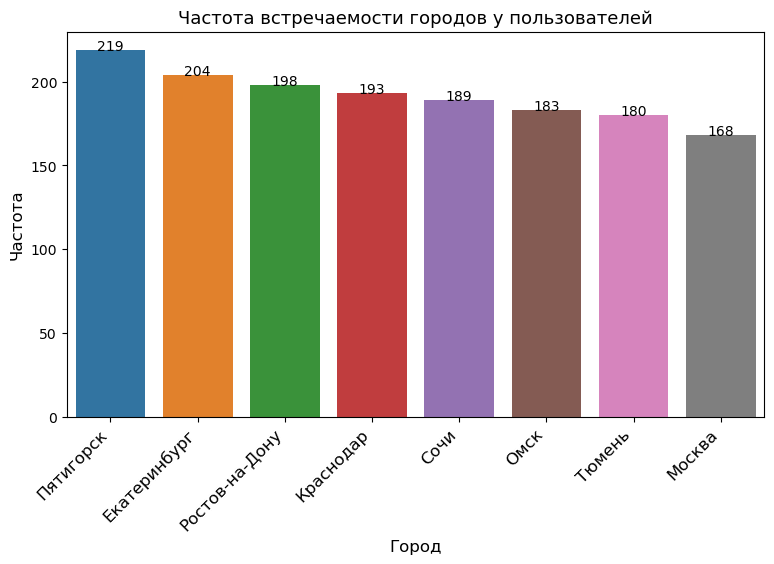

In [17]:
# Построим график частоты встречаемости городов у пользователей
plt.figure(figsize=(9, 5))
sns.countplot(x='city', data=data_users, order=data_users['city'].value_counts().index)
plt.title('Частота встречаемости городов у пользователей', fontsize=13) 
plt.xlabel('Город', fontsize=12)  
plt.ylabel('Частота', fontsize=12) 

# Добавление подписей для каждого столбца
for i, (city, value) in enumerate(data_users['city'].value_counts().items()):
    plt.text(i, value + 0.005, f'{value}', ha='center', fontsize=10)  # Устанавливаем размер шрифта для текста

plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=10) 
plt.show()

По графику видно, что больше всего пользователей встречается из города Пятигорск. Реже всего встречаются пользователи из Москвы.

### 3.2 Соотношение пользователей с подпиской и без подписки <a id="section_3_2"></a>

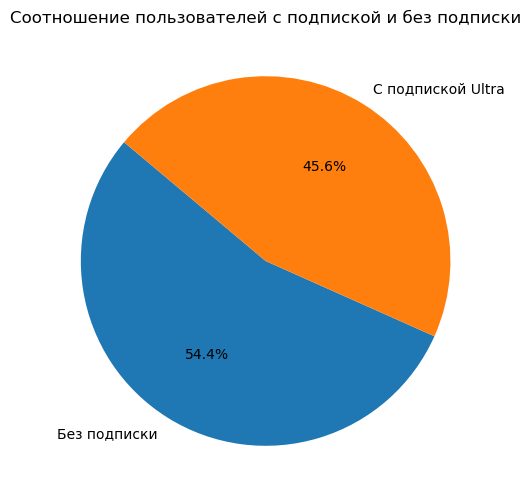

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [18]:
# Подсчет количества пользователей с подпиской и без подписки
count_subscription = data_users['subscription_type'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(count_subscription, labels=['Без подписки', 'С подпиской Ultra'], autopct='%1.1f%%', startangle=140)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

display(count_subscription)

По графику видно, что пользователей без подписки больше, чем с подпиской

### 3.3 Возраст пользователей <a id="section_3_3"></a>

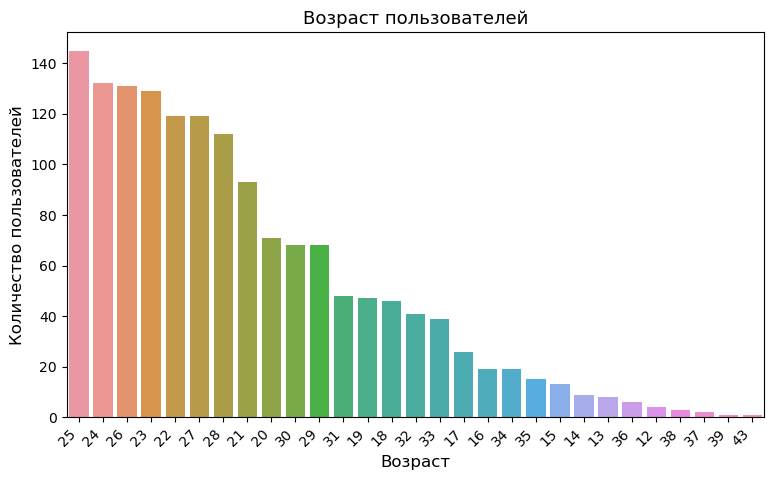

In [19]:
# Построим график распределения возраста у пользователей
plt.figure(figsize=(9, 5))
sns.countplot(x='age', data=data_users, order=data_users['age'].value_counts().index)
plt.title('Возраст пользователей', fontsize=13) 
plt.xlabel('Возраст', fontsize=12)  
plt.ylabel('Количество пользователей', fontsize=12) 
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10) 
plt.show()

In [20]:
# Посчитаем и выведем частоту встречаемости возраста
count_age = data_users['age'].value_counts()
display(count_age.head(10))

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
Name: count, dtype: int64

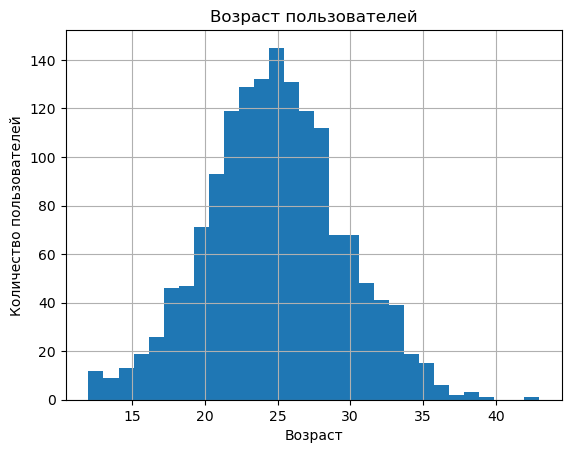

In [21]:
# Построим гистограмму распределения возраста
plt.hist(data_users['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [22]:
# Выведем основные статистические данные
data_users['age'].describe().round(2)

count    1534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

По выведенной информации и графикам видно, что больше всего подписчиков в возрасте от 22 до 28 лет. Распределение величины симметрично. Пользователи младше 15 лет и старше 40 встречаются крайне кредко.

### 3.4 Расстояние, которое пользователь преодолел за одну поездку <a id="section_3_4"></a>

In [23]:
# Посмотрим на самые короткие поездки (в метрах)
display(round(data_rides['distance'].sort_values(), 2).head(10))

11555     0.86
9541      2.57
13690     4.33
8658      6.78
7841      7.10
8906     11.28
8324     12.23
13940    15.00
15626    15.37
11862    15.63
Name: distance, dtype: float64

In [24]:
# Посмотрим на самые длинные поездки (в метрах)
display(round(data_rides['distance'].sort_values(ascending=False), 2).head(10))

16309    7211.01
16484    7066.00
15580    6908.49
17171    6760.94
17242    6724.93
10341    6671.97
11385    6601.20
12086    6538.94
10915    6535.39
11319    6503.60
Name: distance, dtype: float64

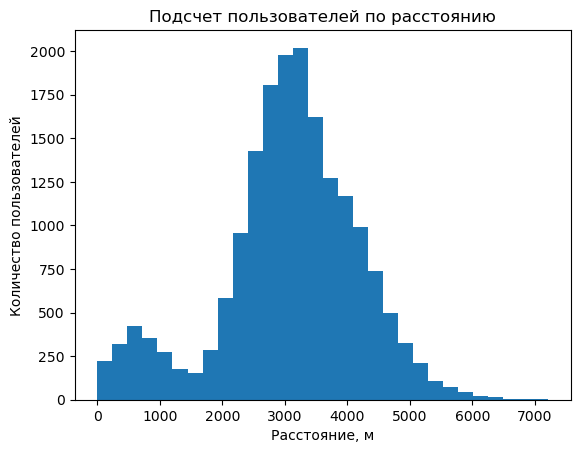

In [25]:
# Построим гистограмму распределения расстояния, которое пользователь преодолел за одну поездку
plt.hist(data_rides['distance'], bins = 30)
plt.title('Подсчет пользователей по расстоянию')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

1) На графике видны два пика, что говорит о наличии двух типов пользователей:
    - Пользователи с короткими поездками до 1500 метров - скорее всего использующих сервис для развлечений
    - Пользователи с длинными поездками свыше 1500 метров - возможно испопользующих сервис как замену общественному транспорту
2) Из графика также видно, что основная масса пользователей проезжает от 1 до 5 км

In [26]:
# Статистика по величине расстояния поездок
display(data_rides['distance'].describe().T)

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

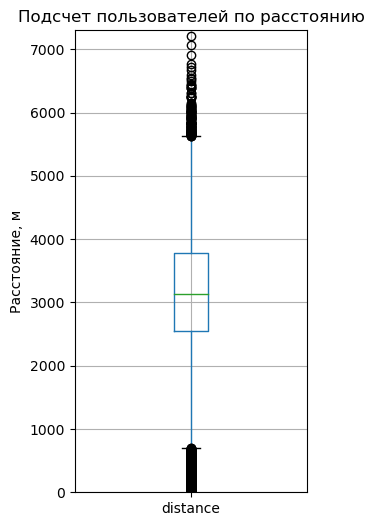

In [27]:
# Построим диаграмму размаха для данной переменной
data_rides.boxplot(column='distance', figsize=(3, 6))
plt.title('Подсчет пользователей по расстоянию')
plt.ylim(0, 7300)
plt.ylabel('Расстояние, м')
plt.show()

По диаграмме размаха и статистическим характеристикам видно, что в среднем, пользователь проезжает 3071м пути.

### 3.5 Продолжительность поездок <a id="section_3_5"></a>

In [28]:
# Самые короткие поездки
data_rides['duration'].sort_values().head(10)

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
15015    0.5
13012    0.5
7508     0.5
16589    0.5
9049     0.5
Name: duration, dtype: float64

In [29]:
# Самые долгие поездки
data_rides['duration'].sort_values(ascending=False).head(10)

4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
143     38.125729
3729    37.014141
499     36.906491
6348    36.809310
4653    36.622595
Name: duration, dtype: float64

In [30]:
# Статистика по данным о продолжительности поездок
data_rides['duration'].describe().round(2)

count    18068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

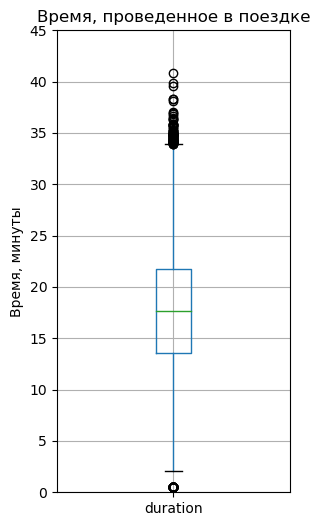

In [31]:
# Построим диаграмму размаха для продолжительности поездок
data_rides.boxplot(column='duration', figsize=(3, 6))
plt.title('Время, проведенное в поездке')
plt.ylim(0, 45)
plt.ylabel('Время, минуты')
plt.show()

Из выведенных статистики и графика видно:
- Самые короткие поездки длятся не больше половины минуты. Возможно пользователи так пробуют новую для себя услугу или самокат оказывается сломанным.
- Самые длинные поездки - порядка 40 минут.
- Среднее время поездки составляет от 14 до 22 минут.

### 3.6 Выводы <a id="section_3_6"></a>

- Больше всего пользователей встречается из города Пятигорск. Реже всего встречаются пользователи из Москвы.
- Пользователей без подписки больше, чем с подпиской
- Больше всего подписчиков в возрасте от 22 до 28 лет. Распределение величины симметрично. Пользователи младше 15 лет и старше 40 встречаются крайне кредко.
- На гистограмме распределения расстояния, которое пользователь преодолел, видны два пика, что говорит о наличии двух типов пользователей:
    - Пользователи с короткими поездками до 1500 метров - скорее всего использующих сервис для развлечений
    - Пользователи с длинными поездками свыше 1500 метров - возможно испопользующих сервис как замену общественному транспорту
- Основная масса пользователей проезжает от 1 до 5 км
- Всреднем пользователь проезжает 3071м пути.
- Самые короткие поездки длятся не больше половины минуты. Возможно пользователи так пробуют новую для себя услугу или самокат оказывается сломанным.
- Самые длинные поездки - порядка 40 минут.
- Среднее время поездки составляет от 14 до 22 минут.

## 4. Объединение данных <a id="section_4"></a>

### 4.1 Объединие всех данных в один датафрейм <a id="section_4_1"></a>

In [32]:
# Выведем размеры исходных датафреймов, до объединения
print(f"data_users: строк {data_users.shape[0]}, столбцов {data_users.shape[1]}")
print(f"data_rides: строк {data_rides.shape[0]}, столбцов {data_rides.shape[1]}")
print(f"data_subs:  строк {data_subs.shape[0]}, столбцов {data_subs.shape[1]}")

data_users: строк 1534, столбцов 5
data_rides: строк 18068, столбцов 5
data_subs:  строк 2, столбцов 4


In [33]:
# Сначала объединим данные о пользователях и поездках по столбцу 'user_id'
df = data_users.merge(data_rides, on='user_id', how='left')

# Затем обогатим данные подробностями о подписках
all_data = df.merge(data_subs, on='subscription_type', how='left')

# Выведем размер полученного датафрейма, после объединения данных
print(f"all_data:  строк {all_data.shape[0]}, столбцов {all_data.shape[1]}")  

# Выведем первые 5 строк
all_data.head()

all_data:  строк 18068, столбцов 12


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [34]:
# Убедимся, что данные были консистентны - т.е. по каждому пользователю была информация о поездках и подписке
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Из выведенной информации видно, что ни одно поле не содержит пропусков.

- В конечном датасете 18068 строк, как общее количество поездок из датасета `data_rides` - значит каждый пользователь из `data_users` совершил как минимум одну поездку.
- Отсутствие пропусков в полученном датасете говорит о консистентности данных в исходных датасетах.

### 4.2 Разделение данных по пользователям с подпиской и без <a id="section_4_2"></a>

In [35]:
# Вынесем пользователей с подпиской "ultra" в отдельный датасет
users_ultra = all_data.query('subscription_type == "ultra"').reset_index()
users_ultra.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [36]:
# В другой датасет вынесем пользователей без подписки
users_free = all_data.query('subscription_type == "free"').reset_index()
users_free.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [37]:
# Посмотрим размеры полученных датафреймов
print(f"users_ultra: строк {users_ultra.shape[0]}, столбцов {users_ultra.shape[1]}")
print(f"users_free: строк {users_free.shape[0]}, столбцов {users_free.shape[1]}")

users_ultra: строк 6500, столбцов 13
users_free: строк 11568, столбцов 13


После зазделения общей информации о пользователях по наличию подписки, мы получили два датасета:
- Датасет на 6500 строк с информацией о пользователях с платной подпиской
- Датасет на 11568 строк с информацией о пользователях без платной подписки

### 4.3 Визуализация информации <a id="section_4_3"></a>

#### 4.3.1 Расстояние поездок для пользователей с подпиской и без <a id="section_4_3_1"></a>

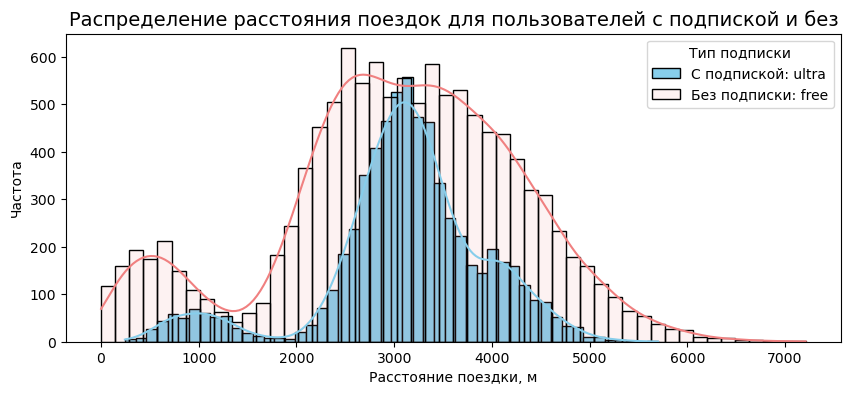

In [38]:
# Построим график распределения расстояния поездок для пользователей с подпиской и без
plt.figure(figsize=(10, 4))
sns.histplot(users_ultra['distance'], bins=50, kde=True, color='skyblue', alpha=1, label='С подпиской: ultra')
sns.histplot(users_free['distance'], bins=50, kde=True, color='lightcoral', alpha=0.1, label='Без подписки: free')
plt.title('Распределение расстояния поездок для пользователей с подпиской и без', fontsize=14)
plt.xlabel('Расстояние поездки, м', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.legend(title='Тип подписки', title_fontsize='10')
plt.show()

In [39]:
# Статистика по данным о расстояниях поездок для пользователей с подпиской
users_ultra['distance'].describe().round(2)

count    6500.00
mean     3115.45
std       836.90
min       244.21
25%      2785.44
50%      3148.64
75%      3560.57
max      5699.77
Name: distance, dtype: float64

In [40]:
# Статистика по данным о расстояниях поездок  для пользователей без подписки
users_free['distance'].describe().round(2)

count    11568.00
mean      3045.50
std       1246.17
min          0.86
25%       2366.56
50%       3114.65
75%       3905.70
max       7211.01
Name: distance, dtype: float64

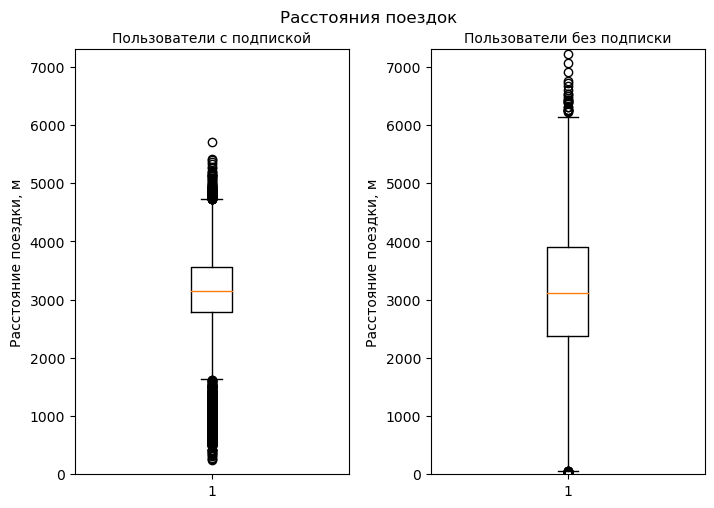

In [41]:
# Построим диаграмму размаха для расстояния поездок для пользователей с и без подписки
fig, ax = plt.subplots(1, 2, figsize=(7, 5))

ax[0].boxplot(users_ultra['distance'])
ax[0].set_title('Пользователи с подпиской', fontsize=10)
ax[0].set_ylabel('Расстояние поездки, м')
ax[0].set_ylim(0, 7300)

ax[1].boxplot(users_free['distance'])
ax[1].set_title('Пользователи без подписки', fontsize=10)
ax[1].set_ylabel('Расстояние поездки, м')
ax[1].set_ylim(0, 7300)

plt.suptitle('Расстояния поездок', fontsize=12)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()

- Данные с подпиской имеют уже диапазон расстояния поездок, нежели без подписки. 
- У пользователей без подписки значительно больше коротких поездок - до 1 км и в целом максимальная дальность поездки выше, чем у платных пользователей. 
- Данные с подпиской имеют также 2 пика как и у данных без подписки, но первый пик при этом не так ярко выражен как у пользователей без подписки.
- Медианное значение расстояния поездки для пользователей с подпиской - 3115.45 м.
- Медианное значение расстояния поездки для пользователей без поездки - 3045.50 м.

#### 4.3.2 Время поездок для пользователей с подпиской и без <a id="section_4_3_2"></a>

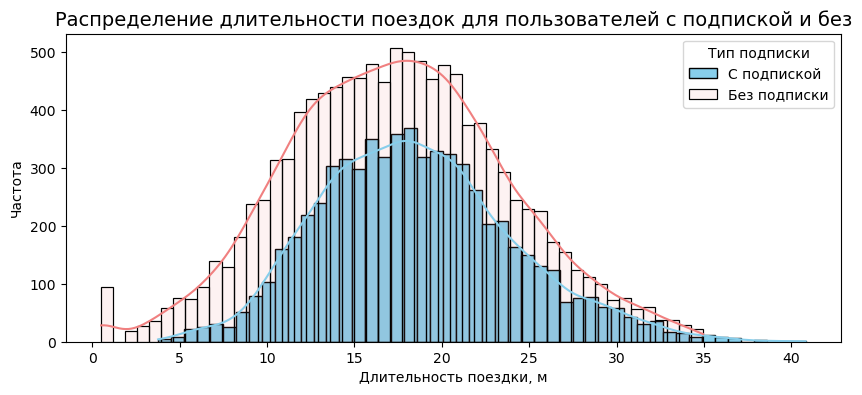

In [42]:
# Построим график распределения расстояния поездок для пользователей с подпиской и без
plt.figure(figsize=(10, 4))
sns.histplot(users_ultra['duration'], bins=50, kde=True, color='skyblue', alpha=1, label='С подпиской')
sns.histplot(users_free['duration'], bins=50, kde=True, color='lightcoral', alpha=0.1, label='Без подписки')
plt.title('Распределение длительности поездок для пользователей с подпиской и без', fontsize=14)
plt.xlabel('Длительность поездки, м', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.legend(title='Тип подписки', title_fontsize='10')
plt.show()

- На графике видно, что для пользователей с подпиской характерно бОльшее количество длинных поездок.
- У пользователей с подпиской распределение длительности поездок имеет более ярко выраженный хвост в сторону длительных поездок - до 40 минут. 
- У пользователей с подпиской короткие поездки начинаются с 4 минут
- У пользователей без подписки короткие поездки начинаются от 1 минуты.

In [43]:
# Статистика по данным о длительности поездок для пользователей с подпиской
users_ultra['duration'].describe().round(2)

count    6500.00
mean       18.54
std         5.57
min         3.76
25%        14.52
50%        18.18
75%        21.88
max        40.82
Name: duration, dtype: float64

In [44]:
# Статистика по данным о длительности поездок для пользователей без подписки
users_free['duration'].describe().round(2)

count    11568.00
mean        17.39
std          6.33
min          0.50
25%         12.96
50%         17.33
75%         21.59
max         34.95
Name: duration, dtype: float64

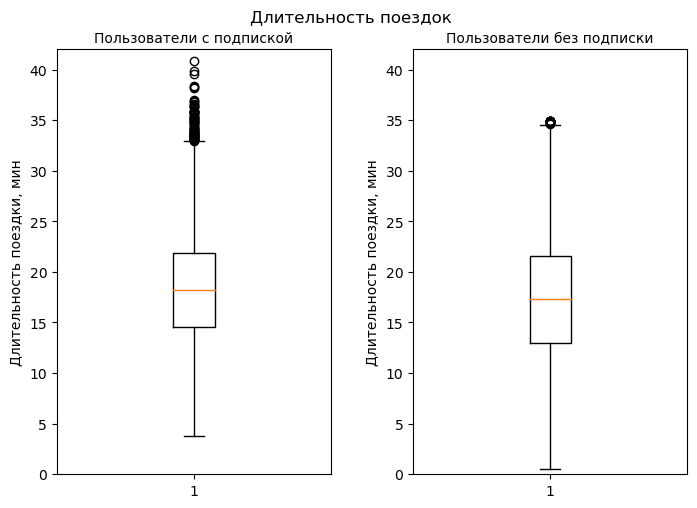

In [45]:
# Построим диаграмму размаха для длительности поездок для пользователей с и без подписки
fig, ax = plt.subplots(1, 2, figsize=(7, 5))

ax[0].boxplot(users_ultra['duration'])
ax[0].set_title('Пользователи с подпиской', fontsize=10)
ax[0].set_ylabel('Длительность поездки, мин')
ax[0].set_ylim(0, 42)

ax[1].boxplot(users_free['duration'])
ax[1].set_title('Пользователи без подписки', fontsize=10)
ax[1].set_ylabel('Длительность поездки, мин')
ax[1].set_ylim(0, 42)

plt.suptitle('Длительность поездок', fontsize=12)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()

На диаграммах размаха продолжительности поездок видно:
- Для пользователей с подпиской и без медианные значения длительности поездок достаточно близки - 18.54 и 17.39 минут соответственно. 
- Большая часть данных сосредоточена в диапазоне примерно от 15 до 22 минут у пользователей с подпиской и в диапазоне от 13 до 22 минут у пользователей без подписки.

### 4.4 Выводы <a id="section_4_4"></a>

- Для пользователей с подпиской характерно большее количество длинных поездок.
- У пользователей с подпиской распределение длительности поездок имеет более ярко выраженный хвост в сторону длительных поездок - до 40 минут. 
- У пользователей с подпиской короткие поездки начинаются с 4 минут
- У пользователей без подписки короткие поездки начинаются от 1 минуты.
- Для пользователей с подпиской и без медианные значения длительности поездок достаточно близки - 18.54 и 17.39 минут соответственно. 
- Большая часть данных по длительности поездок сосредоточена в диапазоне примерно от 15 до 22 минут у пользователей с подпиской и в диапазоне от 13 до 22 минут у пользователей без подписки.

## 5. Подсчёт выручки <a id="section_5"></a>

### 5.1 Помесячная агрегация данных<a id="section_5_1"></a>

Создадим датафрейм с агрегированными данными о поездках для каждого пользователя за каждый месяц на основе датафрейма с объединёнными данными:
- суммарное расстояние
- количество поездок
- суммарное время

In [46]:
# Предварительно округлим до целого в большую сторону длительность каждой поездки
all_data['duration'] = np.ceil(all_data['duration']).astype(int)
all_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


In [47]:
# Агрегируем данные о поездках для каждого пользователя за каждый месяц
all_data_agg = all_data.groupby(
        ['user_id', 'name', 'age', 'city', 'subscription_type', 'month', 
         'minute_price', 'start_ride_price', 'subscription_fee']
    ).agg({
        'distance': 'sum',  # Суммарное расстояние за месяц
        'duration': 'sum',  # Суммарная длительность всех поездок за месяц
        'date': 'count'     # Количество поездок за месяц
    }).reset_index()


# Переименуем столбцы
all_data_agg.rename(columns={
    'distance': 'distance_sum',
    'duration': 'duration_sum',
    'date': 'trips_count'
}, inplace=True)

all_data_agg.head()

,user_id,name,age,city,subscription_type,month,minute_price,start_ride_price,subscription_fee,distance_sum,duration_sum,trips_count
0,1,Кира,22,Тюмень,ultra,1,6,0,199,7027.511294,42,2
1,1,Кира,22,Тюмень,ultra,4,6,0,199,754.159807,7,1
2,1,Кира,22,Тюмень,ultra,8,6,0,199,6723.470560,46,2
3,1,Кира,22,Тюмень,ultra,10,6,0,199,5809.911100,32,2
4,1,Кира,22,Тюмень,ultra,11,6,0,199,7003.499363,56,3


### 5.2 Помесячная выручка<a id="section_5_2"></a>

Добавим в датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. 

Помесячная выручка считается по формуле: `стоимость старта поездки` х `количество поездок` + `стоимость одной минуты поездки` × `общая продолжительность всех поездок в минутах` + `стоимость подписки`.

In [48]:
# Расчет помесячной выручки
all_data_agg['income'] = (
    all_data_agg['start_ride_price'] * all_data_agg['trips_count']  + 
    all_data_agg['minute_price']     * all_data_agg['duration_sum'] + 
    all_data_agg['subscription_fee'])

all_data_agg.head()

,user_id,name,age,city,subscription_type,month,minute_price,start_ride_price,subscription_fee,distance_sum,duration_sum,trips_count,income
0,1,Кира,22,Тюмень,ultra,1,6,0,199,7027.511294,42,2,451
1,1,Кира,22,Тюмень,ultra,4,6,0,199,754.159807,7,1,241
2,1,Кира,22,Тюмень,ultra,8,6,0,199,6723.470560,46,2,475
3,1,Кира,22,Тюмень,ultra,10,6,0,199,5809.911100,32,2,391
4,1,Кира,22,Тюмень,ultra,11,6,0,199,7003.499363,56,3,535


### 5.3 Вывод <a id="section_5_3"></a>

На этапе подсчета выручки была проделана следующая работа:
- Создали датафрейм с суммарным времением, суммарной дистанцией и количеством поездок для каждого пользователя по месяцам.
- Произвели расчет и добавили столбец с суммарной выручкой для каждого пользователя в зависимости от типа подписки.

## 6. Проверка гипотез <a id="section_6"></a>

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### 6.1 Тратят ли пользователи с подпиской больше времени на поездки? <a id="section_6_1"></a>

Даны две генераные совокупности:
1) Длительность поездок пользователей с подпиской `users_ultra['duration']`, количество наблюдений - 6500
2) Длительность поездок пользователей без подписки `users_free['duration']`, количество наблюдений - 11568

**Цель:** Необходимо понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

**Гипотеза:** Пользователи с подпиской тратят в среднем больше времени на поездки, чем пользователи без подписки.

**Нулевая гипотеза (H0):** Средние значения продолжительности поездок для пользователей с подпиской и без подписки **равны**.

**Альтернативная гипотеза (H1):** Средние значения продолжительности поездок для пользователей с подпиской **больше**, чем у пользователей без подписки.

**Уровень значимости (alpha):** Установим значение **0.05**.

**Метод проверки гипотезы:** **T-тест**, так как данные удовлетворяют следующим условиям:
- Генеральные совокупности не зависят друг от друга
- Согласно ЦПТ выборочные средние нормально распределены, так как размер выборок достаточно большой
- Дисперсии рассматриваемых генеральных совокупностей равны  

**Критерий оценки:** Если **p-значение**, полученное в результате **Т-теста**, будет меньше уровня значимости **alpha**, то нулевая гипотеза будет отвергнута в пользу альтернативной, и мы сможем утверждать, что есть статистически значимое различие в продолжительности поездок между пользователями с подпиской и без.

In [49]:
# Для проведения Т-теста используем метод для проверки гипотезы о равенстве 
# среднего двух генеральных совокупностей `ttest_ind` из библиотеки `scipy.stats`, 
# при этом передадим этому методу параметр `equal_var = False`, так как число 
# наблюдений в генеральных совокупностях различны, а также параметр `alternative='greater'`, 
# так как альтернативная гипотеза правосторонняя.
t, p = st.ttest_ind(users_ultra['duration'], users_free['duration'], equal_var=False, alternative='greater')
print(f'T-статистика: {t.round(2)}')
print(f'p-значение: {p:.3}')

# Уровень значимости
alpha = 0.05

if p < alpha:
    print('''
        Средние значения различны. 
        Отвергаем нулевую гипотезу в пользу альтернативной - cредние 
        значения продолжительности поездок для пользователей с подпиской 
        больше, чем у пользователей без подписки.
    ''')
else:
    print('''
        Cредние значения схожи. 
        Нет оснований отвергнуть нулевую гипотезу - cредние значения 
        продолжительности поездок для пользователей с подпиской и без подписки равны.
    ''')   

T-статистика: 12.68
p-значение: 5.68e-37

        Средние значения различны. 
        Отвергаем нулевую гипотезу в пользу альтернативной - cредние 
        значения продолжительности поездок для пользователей с подпиской 
        больше, чем у пользователей без подписки.
    


Итак, по результатам T-теста, мы  отвергаем нулевую гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free. То есть cредние значения продолжительности поездок для пользователей с подпиской больше, чем у пользователей без подписки, а значит пользователи с подпиской "выгоднее" для компании.
Поэтому результаты теста указывают на поддержание идеи продакт-менеджеров об увеличении количествоа пользователей с подпиской.

### 6.2 Оптимальное ли расстояние поездки у пользователей с подпиской? <a id="section_6_2"></a>

Дана генеральная совокупность - расстояние, которое пользователи с подпиской проезжают за одну поездку `users_ultra['distance']`. Число наблюдений 6500.

**Цель:** Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

**Гипотеза:** пользователи с подпиской проезжают в среднем не больше 3130 метров.

**Нулевая гипотеза (H0):** Средние значения расстояние, преодоленное пользователем с подпиской **равно 3130 метров**.

**Альтернативная гипотеза (H1):** Средние значения расстояние, преодоленное пользователем с подпиской **больше 3130 метров** 

**Уровень значимости (alpha):** Установим значение **0.05**.

**Метод проверки гипотезы:** **одновыборочный T-тест**, так как мы сравниваем среднее значение с известным значением - 3130м.   

**Критерий оценки:** Если **p-значение**, полученное в результате **T-теста**, будет меньше уровня значимости **alpha**, то нулевая гипотеза будет отвергнута в пользу альтернативной, и мы сможем утверждать, что есть статистически значимое различие в расстояние, преодоленное пользователем с подпиской и без.

In [50]:
# Для проведения одновыборочного t-теста используем метод проверки статистических гипотез 
# о среднем значении в генеральной совокупности, когда у нас есть только одна выборка 
# данных `ttest_1samp` из библиотеки `scipy.stats`, при этом передадим этому методу 
# параметр `alternative='greater',` так как альтернативная гипотеза левосторонняя.

optimal_distance = 3130

t, p = st.ttest_1samp(users_ultra['distance'], optimal_distance, alternative='greater')
print(f'T-статистика: {t.round(2)}')
print(f'p-значение: {p.round(4)}\n')

# Уровень значимости
alpha = 0.05

if p < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние больше 3130 метров.')
else:
    print('Нет оснований отвергать нулевую гипотезу: среднее расстояние равно 3130 метров.')

T-статистика: -1.4
p-значение: 0.9195

Нет оснований отвергать нулевую гипотезу: среднее расстояние равно 3130 метров.


По результатам T-теста, мы не отвергаем нулевую гипотезу: среднее расстояние равно 3130 метров. То есть мы не можем утверждать, что пользователи за одну поездку в среднем проезжают расстояние меньше 3130 метров.

### 6.3 От каких пользователей выручка выше - с подпиской или без? <a id="section_6_3"></a>

In [51]:
# Сформируем две генеральные совокупности
income_ultra = all_data_agg.query('subscription_type == "ultra"')['income']
income_free = all_data_agg.query('subscription_type == "free"')['income']

print(f"Число наблюдений в генеральных совокупностях:")
print(f"1. Выручка от пользователей с подпиской - {income_ultra.shape[0]} наблюдений")
print(f"2. Выручка от пользователей без подписки - {income_free.shape[0]} наблюдений")

Число наблюдений в генеральных совокупностях:
1. Выручка от пользователей с подпиской - 4533 наблюдений
2. Выручка от пользователей без подписки - 6798 наблюдений




**Цель:** Необходимо понять - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Гипотеза:** Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Нулевая гипотеза (H0):** Средние значения помесячной выручки от пользователей с подпиской и без подписки **равны**.

**Альтернативная гипотеза (H1):** Средние значения помесячной выручки от пользователей с подпиской **больше**, чем выручка от пользователей без подписки.

**Уровень значимости (alpha):** Установим на уровне **0.05**.

**Метод проверки гипотезы:** **Т-тест**, так как генеральные совокупности удовлетворяют условиям:
- Генеральные совокупности не зависят друг от друга.
- Согласно ЦПТ, выборочные средние нормально распределены, так как размер выборок достаточно большой
- Дисперсии рассматриваемых генеральных совокупностей равны    

**Критерий оценки:** Если **p-значение**, полученное в результате **Т-теста**, будет меньше уровня значимости **alpha**, то нулевая гипотеза будет отвергнута в пользу альтернативной, и мы сможем утверждать, что есть статистически значимое различие в помесячной выручки от пользователей с подпиской и без.

In [52]:
# Для проведения Т-теста используем метод для проверки гипотезы о равенстве 
# среднего двух генеральных совокупностей `ttest_ind` из библиотеки `scipy.stats`, 
# при этом передадим этому методу параметр `equal_var=False,` так как число наблюдений 
# в генеральных совокупностях различны, а также параметр `alternative='greater'`, 
# так как альтернативная гипотеза правосторонняя. 

t, p = st.ttest_ind(income_ultra, income_free, equal_var=False, alternative='greater')
print(f'T-статистика: {t.round(2)}')
print(f'p-значение: {p:.3}\n')

# Уровень значимости
alpha = 0.05

if p < alpha:
    print('Средние значения помесячной выручки различны. Отвергаем нулевую гипотезу в пользу альтернативной.')
else:
    print('Средние значения схожи. Нет оснований отвергнуть нулевую гипотезу.')  

T-статистика: 13.2
p-значение: 8.87e-40

Средние значения помесячной выручки различны. Отвергаем нулевую гипотезу в пользу альтернативной.


По результатам проведенного T-теста, мы отвергаем нулевую гипотезу. То есть, средние значения помесячной выручки от пользователей с подпиской больше, чем выручка от пользователей без подписки.
Значит можно говорить о подтверждении исходной гипотезы о том, что пользователи с подпиской могут быть "выгоднее" для компании, так как они вносят больший финансовый вклад в сервис.

### 6.4 Как изменилось количество обращений в техподдержку? <a id="section_6_4"></a>

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Таким образом, нам дана одна генеральная совокупность, которая состоит из двух зависимых парных выборок - количество обращений в техподдержку до технического обновления сервера приложения и после обновления. Число наблюдений для зависимых парных выборок одинаково.

**Цель:** Выяснить - снизиться ли количество обращений в техподдержку после технического обновления на стороне сервера приложения.

**Гипотеза:** Количество обращений от пользователей снизиться после технического обновления на стороне сервера приложения.

**Нулевая гипотеза (H0):** Средние значения количества обращений до и после обновления серверов **равны**.

**Альтернативная гипотеза (H1):** Среднее количество обращений после обновления серверов **меньше**, чем до обновления.

**Уровень значимости (alpha):** Установим на уровне **0.05**.

**Метод проверки гипотезы:** **парный Т-тест**, так как у нас есть два связанных набора данных, количество обращений до и после обновления для каждого пользователя.

**Критерий оценки:** Если **p-значение**, полученное в результате **Т-теста**, будет меньше уровня значимости **alpha**, то нулевая гипотеза будет отвергнута в пользу альтернативной, и мы сможем утверждать, что есть статистически значимое различие в количестве обращений до и после обращения.

#### Решение
> Для проведения `парного Т-теста` используем метод для сравнения средних значений двух связанных выборок `ttest_rel` из библиотеки `scipy.stats`, при этом передадим этому методу два параметра: выброку до проведения обновления и после.

### 6.5 Выводы <a id="section_6_5"></a>

На этапе проверки гипотез была проделана работа по проверки четырех гипотез: 

- **Первая гипотеза: тратят ли пользователи с подпиской больше времени на поездки?**

По результатам T-теста, мы  отвергли нулевую гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free. То есть cредние значения продолжительности поездок для пользователей с подпиской оказались больше, чем у пользователей без подписки, а значит пользователи с подпиской "выгоднее" для компании.
Поэтому результаты теста указали на поддержание идеи продакт-менеджеров об увеличении количества пользователей с подпиской.

- **Вторая гипотеза: пользователи в среднем проезжают расстояние меньше 3130 метров.**

По результатам T-теста, мы не отвергли нулевую гипотезу: среднее расстояние равно 3130 метров. То есть мы не можем утверждать, что пользователи за одну поездку в среднем проезжают расстояние меньше 3130 метров.

- **Третья гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

По результатам проведенного T-теста, мы отвергли нулевую гипотезу. То есть, средние значения помесячной выручки от пользователей с подпиской оказались больше, чем выручка от пользователей без подписки.
Значит можно говорить о подтверждении исходной гипотезы о том, что пользователи с подпиской могут быть "выгоднее" для компании, так как они вносят больший финансовый вклад в сервис.

- **Четвертая гипотеза: количество обращений в техподдержку значимо снизится после обновления сервера, с которыми взаимодействует мобильное приложение**

Для проведения парного Т-теста решено использовать метод для сравнения средних значений двух связанных выборок ttest_rel из библиотеки scipy.stats, при этом передадим этому методу два параметра: выброку до проведения обновления и после.

## 7. Общий вывод <a id="section_7"></a>

Нам был предоставлен доступ к датасетам, которые содержат данные о некоторых пользователях из нескольких городов, а также об их поездках. В результате исследования данных датасетов были изучены основные статистические показатели, удалены дубликаты, проверены гипотезы.

В ходе статистического анализа данных по аренде самокатов в сервисе GoFast была проделана следующая работа:

1. Загрузка данных и их просмотр 

- имеются три таблицы - с данными о пользователях, поездках и подписках. 
- в данных всех таблиц отсутствуют пропуски.
- таблица с пользователями и поездками связаны идентификатором user_id.
- таблица пользователей и информации с подписками связаны по столбцу subscription_type.

2. Предобработка данных

- привели столбец date к типу даты
- создали новый столбец с номером месяца в таблице с поездками
- проверили на наличие дубликатов, удалили дубликаты в таблице с пользователями
- пропуски в таблицах не обнаружили

3. Исследовательский анализ данных 

- больше всего пользователей встречается из города Пятигорск. Реже всего встречаются пользователи из Москвы.
- пользователей без подписки больше, чем с подпиской
- больше всего подписчиков в возрасте от 22 до 28 лет. Распределение величины симметрично. Пользователи младше 15 лет и старше 40 встречаются крайне кредко.
- на гистограмме распределения расстояния, которое пользователь преодолел, видны два пика, что говорит о наличии двух типов пользователей:
- пользователи с короткими поездками до 1500 метров - скорее всего использующих сервис для развлечений
- пользователи с длинными поездками свыше 1500 метров - возможно испопользующих сервис как замену общественному транспорту
- основная масса пользователей проезжает от 1 до 5 км
- в среднем пользователь проезжает 3071м пути.
- самые короткие поездки длятся не больше половины минуты. Возможно пользователи так пробуют новую для себя услугу или самокат оказывается сломанным.
- самые длинные поездки - порядка 40 минут.
- среднее время поездки составляет от 14 до 22 минут.

4. Объединение данных 

- для пользователей с подпиской характерно большее количество длинных поездок.
- у пользователей с подпиской распределение длительности поездок имеет более ярко выраженный хвост в сторону длительных поездок - до 40 минут. 
- у пользователей с подпиской короткие поездки начинаются с 4 минут
- у пользователей без подписки короткие поездки начинаются от 1 минуты.
- для пользователей с подпиской и без медианные значения длительности поездок достаточно близки - 18.54 и 17.39 минут соответственно. 
- большая часть данных по длительности поездок сосредоточена в диапазоне примерно от 15 до 22 минут у пользователей с подпиской и в диапазоне от 13 до 22 минут у пользователей без подписки.

5. Подсчёт выручки 

- создали датафрейм с суммарным времением, суммарной дистанцией и количеством поездок для каждого пользователя по месяцам.
- произвели расчет и добавили столбец с суммарной выручкой для каждого пользователя в зависимости от типа подписки.

6. Проверка гипотез 

- **Первая гипотеза: тратят ли пользователи с подпиской больше времени на поездки?**

По результатам T-теста, мы  отвергли нулевую гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free. То есть cредние значения продолжительности поездок для пользователей с подпиской оказались больше, чем у пользователей без подписки, а значит пользователи с подпиской "выгоднее" для компании.
Поэтому результаты теста указали на поддержание идеи продакт-менеджеров об увеличении количества пользователей с подпиской.

- **Вторая гипотеза: пользователи в среднем проезжают расстояние меньше 3130 метров.**

По результатам T-теста, мы не отвергли нулевую гипотезу: среднее расстояние равно 3130 метров. То есть мы не можем утверждать, что пользователи за одну поездку в среднем проезжают расстояние меньше 3130 метров.

- **Третья гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

По результатам проведенного T-теста, мы отвергли нулевую гипотезу. То есть, средние значения помесячной выручки от пользователей с подпиской оказались больше, чем выручка от пользователей без подписки.
Значит можно говорить о подтверждении исходной гипотезы о том, что пользователи с подпиской могут быть "выгоднее" для компании, так как они вносят больший финансовый вклад в сервис.

- **Четвертая гипотеза: количество обращений в техподдержку значимо снизится после обновления сервера, с которыми взаимодействует мобильное приложение**

Для проведения парного Т-теста решено использовать метод для сравнения средних значений двух связанных выборок ttest_rel из библиотеки scipy.stats, при этом передадим этому методу два параметра: выброку до проведения обновления и после.

Ссылка на проект в GitHub: https://github.com/chernyakid/gofast-research